In [23]:
import requests
import json
import numpy as np
from IPython.display import Markdown, display

In [24]:
api_key='aGOjXwAEmlq_4O-v2XC6yBEzjNjDTWf1I2IGZM5emyA'

In [25]:
def get_resp_oai(input_text, model):
    url = "https://llm.api.ai8.io/query_llm"
    data = {
        # Specify the model that you want to use
        "model": model,
        "messages": [
                    {"role": "system", "content": "You are a python expert, I want you to design stock price prediction models using different algorithms. All other informations should be ignored."},
                    {"role": "user", "content": input_text}
        ]
    }
    headers = {'Authorization': api_key}
    response = requests.post(url, json=data, headers=headers)
    if response.status_code == 200:
        response_data = json.loads(response.content)
        model_response = extract_message_oai(response_data)
        return model_response
    else:
        return {"statusCode": response.status_code, "body": response.content}

def extract_message_oai(response_data):
    message_content = response_data.get("choices", [])[0].get("message", {}).get("content", "")
    # format the extracted message as markdown
    markdown_content = "---\n\n" + message_content + "\n\n---"
    return markdown_content

In [11]:
data_summary = get_resp_oai('We have a csv file with the columns: Date, Open, High, Low, Close, Adj Close and Volume as the dataset. Give a code to generate the summary of the data. My dataset file name is INFY.NS.csv',"gpt-4-0125-preview")
display(Markdown("<div style='color: #34568B;'>\n\n" + data_summary))

<div style='color: #34568B;'>

---

To generate a summary of your stock dataset, you can use the pandas and matplotlib libraries in Python for basic data analysis and visualization. The summary will include the data's basic statistical details and some visual plots to understand trends in the stock price.

You'll need to ensure you have pandas, matplotlib, and seaborn installed in your environment. If not, you can install them using pip:

```bash
pip install pandas matplotlib seaborn
```

Here is a Python script that reads your CSV file, displays a summary of the dataset including statistical measures, and plots some key aspects like the closing and volume trends.

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_name = 'INFY.NS.csv'
data = pd.read_csv(file_name)

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(data.head())

# Display a concise summary of the dataframe
print("\nConcise summary of the dataset:")
data.info()

# Display basic statistical details
print("\nStatistical details:")
print(data.describe())

# Visualizing the 'Close' price trend
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Visualizing the 'Volume' trend
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='orange')
plt.title('Volume Trend')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation')
plt.show()
```

This script will give you a good starting point for understanding your dataset. It includes:

1. A preview of the first few rows with `head()`.
2. A concise summary including non-null count and data type of each column.
3. Basic statistical details like mean, median, standard deviation, etc.
4. A line plot for the Close price trend.
5. A line plot for the trading Volume trend.
6. A heatmap showing the correlation between different features.

Please make sure to adjust the date parsing and index setting if necessary. For example, if you want to set the 'Date' column as the index and parse the dates:

```python
data = pd.read_csv(file_name, parse_dates=['Date'], index_col='Date')
```

This may help in more accurate plotting and analysis, especially if you're dealing with time-series data intricately.

---

First 5 rows of the dataset:
         Date         Open         High          Low        Close  \
0  2021-01-01  1257.900024  1265.500000  1255.800049  1260.449951   
1  2021-01-04  1269.000000  1290.000000  1261.150024  1288.250000   
2  2021-01-05  1282.000000  1299.000000  1275.050049  1293.800049   
3  2021-01-06  1300.000000  1302.000000  1268.050049  1282.099976   
4  2021-01-07  1296.000000  1297.650024  1255.500000  1262.150024   

     Adj Close    Volume  
0  1178.563599   4253550  
1  1204.557373   7208454  
2  1209.747070   8145280  
3  1198.807007   7161715  
4  1180.153076  10954918  

Concise summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       801 non-null    object 
 1   Open       801 non-null    float64
 2   High       801 non-null    float64
 3   Low        801 non-null    float64
 4   Close      8

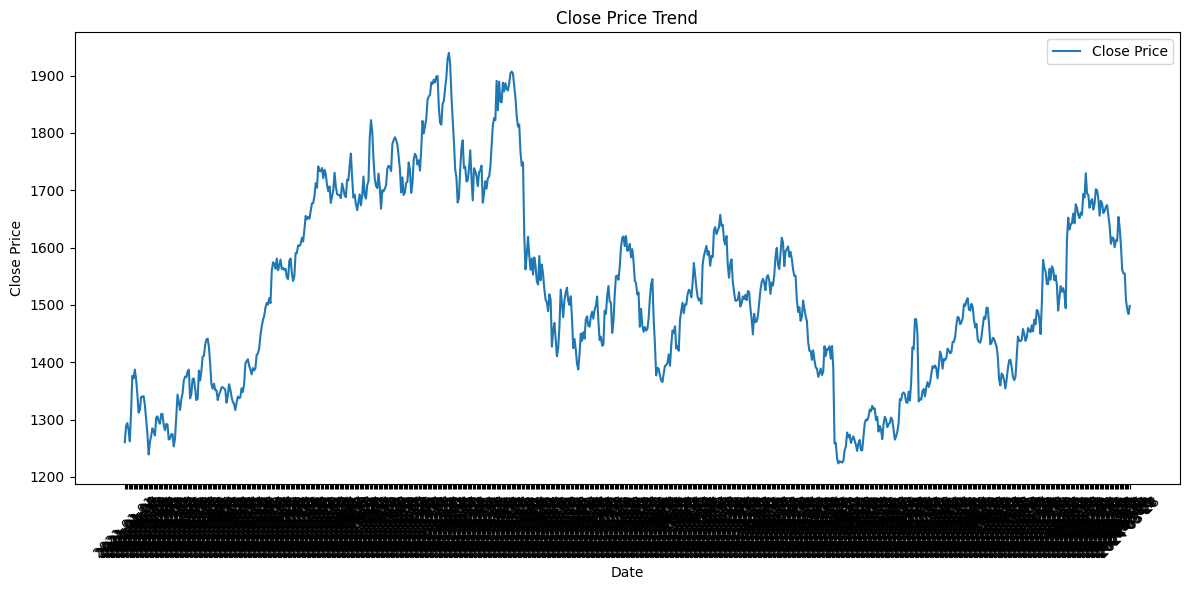

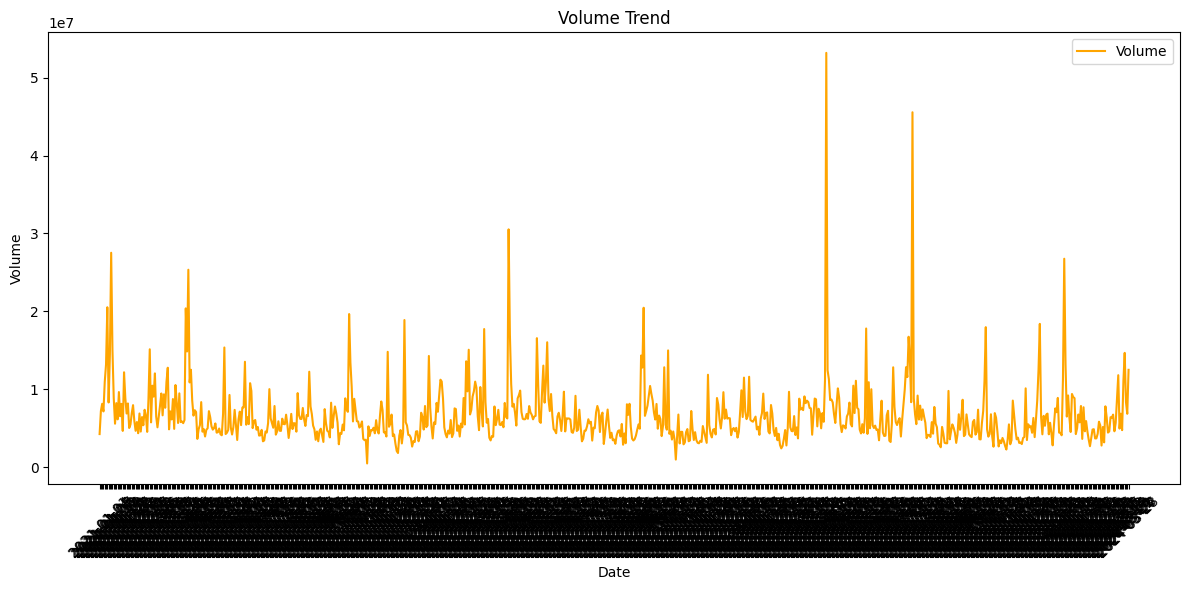

/tmp/ipykernel_163/3616641660.py:45: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


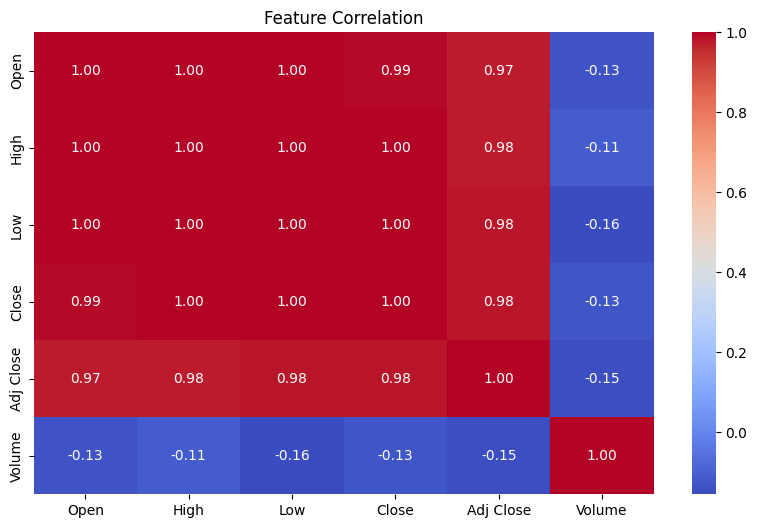

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_name = 'INFY.NS.csv'
data = pd.read_csv(file_name)

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(data.head())

# Display a concise summary of the dataframe
print("\nConcise summary of the dataset:")
data.info()

# Display basic statistical details
print("\nStatistical details:")
print(data.describe())

# Visualizing the 'Close' price trend
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Close Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Visualizing the 'Volume' trend
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='orange')
plt.title('Volume Trend')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation')
plt.show()

In [14]:
possible_algorithms = get_resp_oai('What are the algorithms that we can utilise to predict the future stock price from the data that we have?',"gpt-4-0125-preview")
display(Markdown("<div style='color: #34568B;'>\n\n" + possible_algorithms))

<div style='color: #34568B;'>

---

Predicting future stock prices is a challenging task due to the highly volatile nature of the stock market, influenced by numerous unpredictable factors like economic indicators, company performance, and geopolitical events. However, several algorithms can be applied to model and predict stock prices using historical data. Below are some of the key algorithms often used for stock price prediction:

1. **Linear Regression**: A simple yet powerful tool for modeling the relationship between stock prices and potential predictors. Linear regression can predict future prices by analyzing the linear relationship between the target variable and one or more independent variables.

2. **Logistic Regression**: While typically used for classification problems, logistic regression can be adapted for stock price prediction by categorizing price movements into classes (e.g., "price up" or "price down") instead of predicting exact future prices.

3. **Random Forest**: A type of ensemble learning method, Random Forest uses multiple decision trees to make predictions, reducing the risk of overfitting. It can be particularly useful for capturing the non-linear relationships in stock price data.

4. **Gradient Boosting Machines (GBM)**: Like Random Forest, GBM is an ensemble technique that builds models sequentially, each correcting errors made by the previous ones. GBM can be very effective in predicting stock prices due to its ability to handle complex non-linear patterns.

5. **Support Vector Machines (SVM)**: SVM can be used for regression (SVR) to predict stock prices. It finds the hyperplane that best separates different target values which can be particularly useful when dealing with non-linear data.

6. **Neural Networks**: Deep Learning models, especially those based on neural networks, are increasingly popular for stock price predictions. They can capture complex non-linear relationships through layers of neurons and are particularly powerful when working with large volumes of data.
   
   - **Convolutional Neural Networks (CNNs)**: Though primarily used for image and video recognition tasks, CNNs can be applied to sequence data and have been used in stock price prediction, particularly when using multi-dimensional data (e.g., price, volume, sentiment analysis).
   
   - **Recurrent Neural Networks (RNNs)** and **Long Short-Term Memory (LSTM)** networks: These are well-suited for time series data like stock prices due to their ability to store information from previous time steps, making them powerful for predicting future stock prices based on historical patterns.

7. **AutoRegressive Integrated Moving Average (ARIMA)**: A classic statistical model for time series forecasting that models the differences between observations in order to make predictions.

8. **Prophet**: Developed by Facebook, Prophet is designed for forecasting with daily observations that display patterns on different time scales. It works well with data that has strong seasonal effects and several seasons of historical data.

9. **GARCH (Generalized Autoregressive Conditional Heteroskedasticity)**: Specifically designed to model and predict the volatility of financial time series, which can be quite useful in predicting the stock prices since the volatility is a significant aspect of stock market data.

Each of these algorithms has its strengths and is suited to particular types of data and prediction tasks. For predicting stock prices, it is often beneficial to experiment with multiple models to find the one that best captures the complexities of the stock market data you are working with.

---

In [26]:
svm_model = get_resp_oai('The file name of our dataset is INFY.NS.csv and it has the columns: Date, Open, High, Low, Close, Adj Close and Volume. Give me a code for SVM algorithm to generate a prediction model for the stock price. Also predict the stock price for the next 30 days from the last date in the dataset and print the predictions. Also, visualize the dataset and the future predictions on a graph. Print RMSE, R-Sqaured, MAE and MAPE for the model.',"gpt-4-0125-preview")
display(Markdown("<div style='color: #34568B;'>\n\n" + svm_model))

<div style='color: #34568B;'>

---

To build a stock price prediction model using Support Vector Machine (SVM) and make future predictions along with evaluating the model's performance, I will guide you through the steps and provide the required code. This process involves data loading, preprocessing, model training, evaluation, prediction, and visualization.

**Step 1: Install and Import Necessary Libraries**
First, make sure you have the necessary libraries installed. You might need to install libraries like `pandas`, `numpy`, `sklearn`, `matplotlib`, and `scikit-learn` if you don't already have them.

```bash
pip install pandas numpy matplotlib scikit-learn
```

Here's the code to import them:

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

```

**Step 2: Load and Preprocess the Data**

```python
# Load the dataset
df = pd.read_csv('INFY.NS.csv')

# Filling missing values if any
df.fillna(method='ffill', inplace=True)

# We'll predict 'Adj Close' values
X = df.index.values.reshape(-1, 1)  # Assuming continuous dates as a simple feature for demonstration
y = df['Adj Close'].values

# Scaling the features
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
```

**Step 3: Train the SVM Model**

```python
# Create the SVR model
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train, y_train)
```

**Step 4: Model Evaluation**

Now, let's evaluate the model using the test set and compute RMSE, R-Squared, MAE, and MAPE.

```python
# Predictions
y_pred = model.predict(X_test)

# Inverse transform to get real values
y_pred_real = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r_squared = r2_score(y_test_real, y_pred_real)
mae = mean_absolute_error(y_test_real, y_pred_real)
mape = mean_absolute_percentage_error(y_test_real, y_pred_real)

print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")
print(f"MAE: {mae}")
print(f"MAPE: {mape} %")
```

**Step 5: Future Predictions for the Next 30 Days**

```python
# Generating future dates
future_dates = np.arange(len(X), len(X) + 30).reshape(-1, 1)
future_dates_scaled = scaler_x.transform(future_dates)
future_preds_scaled = model.predict(future_dates_scaled)

# Inverse transform to get real predictions
future_preds = scaler_y.inverse_transform(future_preds_scaled.reshape(-1, 1)).flatten()

print("Future Predictions for the Next 30 Days:")
print(future_preds)
```

**Step 6: Visualization**

Finally, let's visualize the dataset along with our future predictions.

```python
plt.figure(figsize=(14, 7))
plt.plot(df['Adj Close'].values, label='Historical Daily Price')
plt.plot(np.arange(len(X), len(X) + 30), future_preds, label='Future Predictions')
plt.title('Stock Price Predictions')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()
```

Please note that financial time series prediction is highly complex and influenced by numerous factors, and the approach taken here is quite simplified, primarily for educational purposes. A real-world scenario demands more sophisticated methods, considering various features beyond historical price data such as volume, sentiment analysis from news, etc. It's also crucial to understand that stock market predictions can be highly speculative and should be approached with caution.

---

RMSE: 82.0243562932009
R-Squared: 0.7206656447914874
MAE: 66.56494163864902
MAPE: 4.569795253889972 %
Future Predictions for the Next 30 Days:
[1696.97575756 1699.14520533 1701.29347749 1703.42028939 1705.52536204
 1707.60842213 1709.66920209 1711.70744013 1713.72288027 1715.71527238
 1717.68437222 1719.62994146 1721.55174773 1723.44956461 1725.32317171
 1727.17235464 1728.99690507 1730.79662075 1732.57130549 1734.32076921
 1736.04482796 1737.74330391 1739.41602536 1741.06282677 1742.68354874
 1744.27803805 1745.84614763 1747.38773657 1748.90267012 1750.3908197 ]


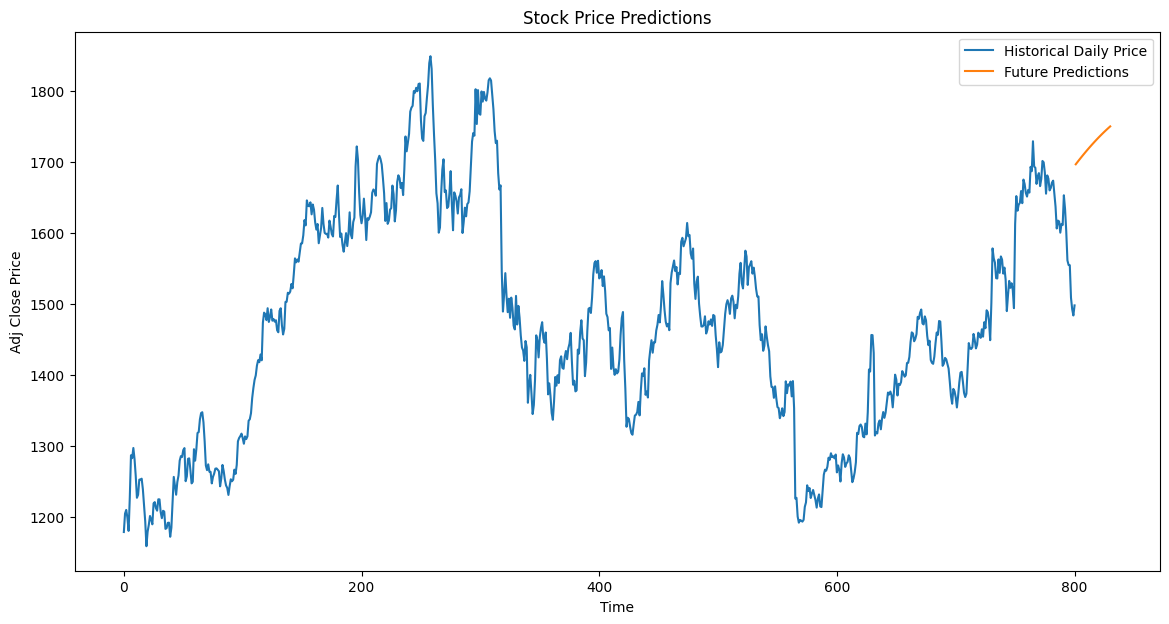

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load the dataset
df = pd.read_csv('INFY.NS.csv')

# Filling missing values if any
df.fillna(method='ffill', inplace=True)

# We'll predict 'Adj Close' values
X = df.index.values.reshape(-1, 1)  # Assuming continuous dates as a simple feature for demonstration
y = df['Adj Close'].values

# Scaling the features
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Create the SVR model
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)

# Inverse transform to get real values
y_pred_real = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r_squared = r2_score(y_test_real, y_pred_real)
mae = mean_absolute_error(y_test_real, y_pred_real)
mape = mean_absolute_percentage_error(y_test_real, y_pred_real)

print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")
print(f"MAE: {mae}")
print(f"MAPE: {mape} %")

# Generating future dates
future_dates = np.arange(len(X), len(X) + 30).reshape(-1, 1)
future_dates_scaled = scaler_x.transform(future_dates)
future_preds_scaled = model.predict(future_dates_scaled)

# Inverse transform to get real predictions
future_preds = scaler_y.inverse_transform(future_preds_scaled.reshape(-1, 1)).flatten()

print("Future Predictions for the Next 30 Days:")
print(future_preds)


plt.figure(figsize=(14, 7))
plt.plot(df['Adj Close'].values, label='Historical Daily Price')
plt.plot(np.arange(len(X), len(X) + 30), future_preds, label='Future Predictions')
plt.title('Stock Price Predictions')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [30]:
LSTM_model = get_resp_oai('The file name of our dataset is INFY.NS.csv and it has the columns: Date, Open, High, Low, Close, Adj Close and Volume. The prices are in INR. Give me a code for LSTM algorithm to generate a prediction model for the stock price. Predict the stock price for the next 30 days from the last date in the dataset and print the predictions. Also, visualize the dataset and the future predictions on a graph. Print RMSE, R-Sqaured, MAE and MAPE for the model.',"gpt-4-0125-preview")
display(Markdown("<div style='color: #34568B;'>\n\n" + LSTM_model))

<div style='color: #34568B;'>

---

To create a stock price prediction model using an LSTM (Long Short-Term Memory) network with the given description, we will follow these steps:

1. **Load and Visualize the Dataset**: First, we'll load the dataset and visualize the closing prices over time.
2. **Preprocess the Dataset**: This includes scaling the data and creating a dataset suitable for training the LSTM, where we typically use the past 'N' days to predict the next day.
3. **Build the LSTM Model**: We'll define an LSTM model architecture suitable for time series prediction.
4. **Train the Model**: Using the preprocessed data.
5. **Prediction and Evaluation**: We'll predict the next 30 days from the last date in the dataset, evaluate the model using RMSE, R-Squared, MAE, and MAPE, and visualize the predictions.
6. **Visualize Predictions**: Alongside historical data.

Here is an outline of how you might write the code for these steps using `keras` for the LSTM and `matplotlib` for plotting. Make sure to install necessary libraries like `pandas`, `numpy`, `sklearn`, `keras`, and `matplotlib` before running the code.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import math

# Load the dataset
df = pd.read_csv('INFY.NS.csv')
# Convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])
# Sort the dataframe by date
df = df.sort_values('Date')

# Visualize the dataset
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.show()

# Preprocessing
df['Close'] = df['Close'].astype(float)
# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Create the scaled training data set
train_data = scaled_data

# Split the data into x_train and y_train datasets
look_back = 100  # Number of previous days to consider for predicting the next day
x_train = []
y_train = []

for i in range(look_back, len(train_data)):
    x_train.append(train_data[i-look_back:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3-dimensional in the form [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100)

# Predict the closing price
predicted_prices = model.predict(x_train)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Calculate performance metrics
real_prices = scaler.inverse_transform(y_train.reshape(-1, 1))
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
mape = np.mean(np.abs((real_prices - predicted_prices) / real_prices)) * 100
r2 = r2_score(real_prices, predicted_prices)

print(f'RMSE: {rmse}, R-Squared: {r2}, MAE: {mae}, MAPE: {mape}%')

# Predict next 30 days and plot
# For simplicity, we are directly using the model to predict the next day, for each of the next 30 days.
# This approach can be optimized by updating the input for each prediction.
# Here's an illustrative approach, emphasizing the need for proper data handling for accurate forecasting.

last_100_days = train_data[-100:]
current_batch = last_100_days.reshape(1, look_back, 1)

predictions = []
for i in range(30):
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Inverse transform to get actual values
predictions = scaler.inverse_transform(predictions)

# Plotting
predicted_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Historical Daily Close Price')
plt.plot(predicted_dates, predictions, color='r', label='Predicted Daily Close Price')
plt.title('Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.legend()
plt.show()
```
Please adjust the number of epochs, batch size, and the look-back period based on your computational resources and the specific requirements of your dataset for possibly better results. Also, the code segment for future predictions is simplified for demonstration; real-world forecasting may involve retraining the model with new data as it becomes available or developing a more sophisticated way to generate future input data.


---

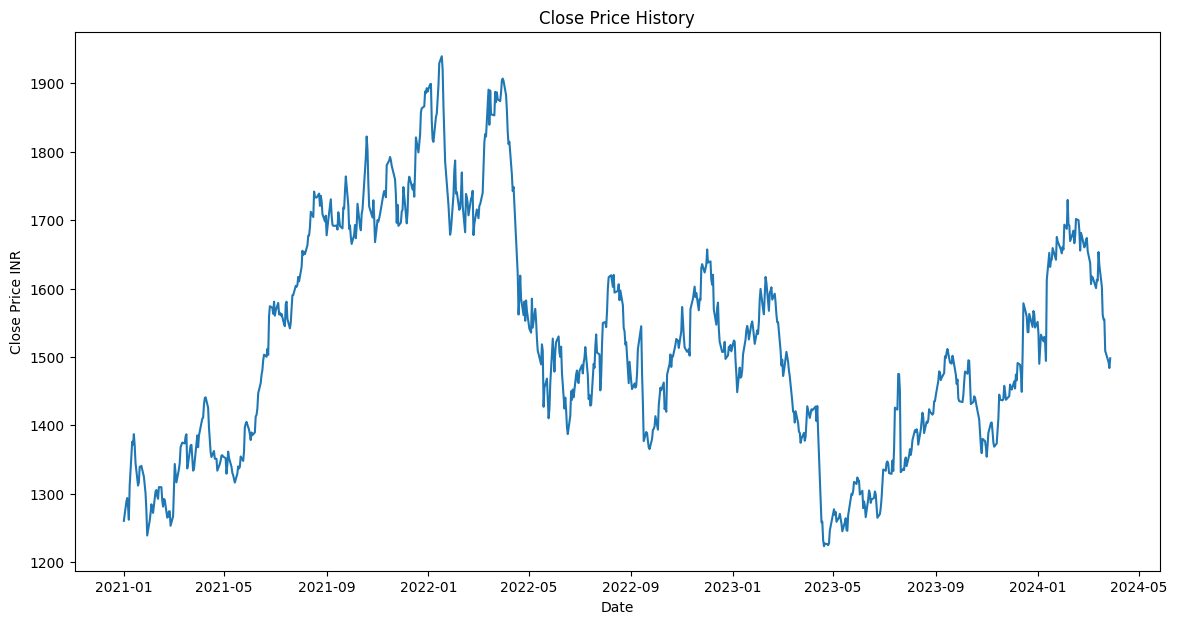

Epoch 1/100
11/11 [==============================] - 5s 156ms/step - loss: 0.0900
Epoch 2/100
11/11 [==============================] - 2s 156ms/step - loss: 0.0166
Epoch 3/100
11/11 [==============================] - 2s 158ms/step - loss: 0.0118
Epoch 4/100
11/11 [==============================] - 2s 160ms/step - loss: 0.0090
Epoch 5/100
11/11 [==============================] - 2s 160ms/step - loss: 0.0071
Epoch 6/100
11/11 [==============================] - 2s 154ms/step - loss: 0.0064
Epoch 7/100
11/11 [==============================] - 2s 159ms/step - loss: 0.0060
Epoch 8/100
11/11 [==============================] - 2s 159ms/step - loss: 0.0065
Epoch 9/100
11/11 [==============================] - 2s 153ms/step - loss: 0.0057
Epoch 10/100
11/11 [==============================] - 2s 159ms/step - loss: 0.0057
Epoch 11/100
11/11 [==============================] - 2s 154ms/step - loss: 0.0055
Epoch 12/100
11/11 [==============================] - 2s 157ms/step - loss: 0.0051
Epoch 13/100


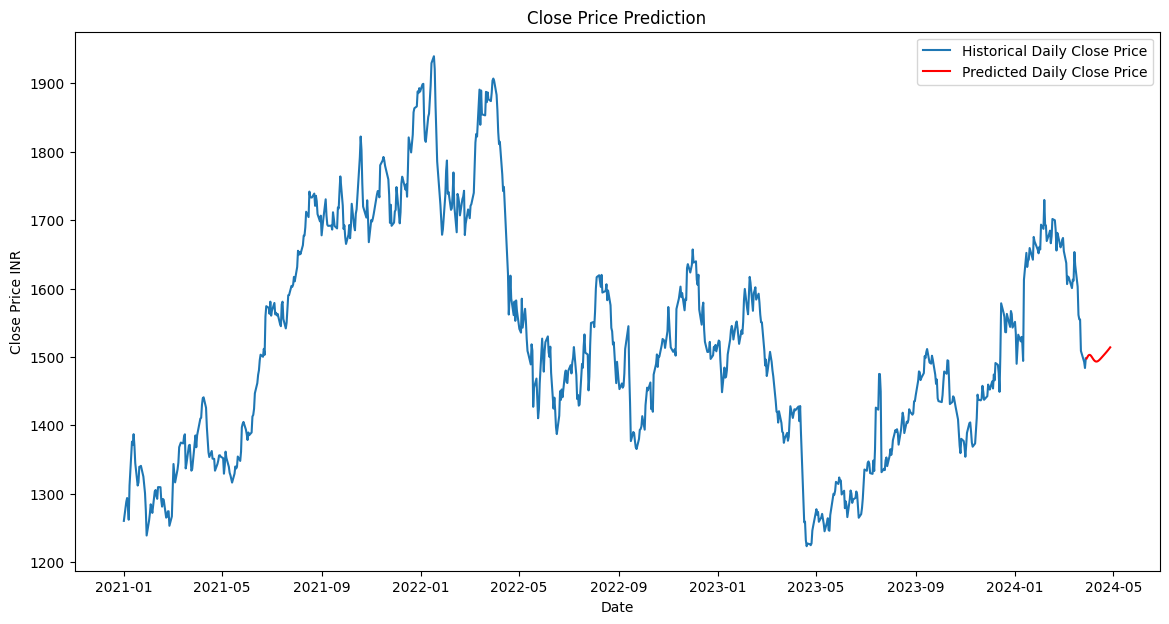

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import math

# Load the dataset
df = pd.read_csv('INFY.NS.csv')
# Convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])
# Sort the dataframe by date
df = df.sort_values('Date')

# Visualize the dataset
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.show()

# Preprocessing
df['Close'] = df['Close'].astype(float)
# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Create the scaled training data set
train_data = scaled_data

# Split the data into x_train and y_train datasets
look_back = 100  # Number of previous days to consider for predicting the next day
x_train = []
y_train = []

for i in range(look_back, len(train_data)):
    x_train.append(train_data[i-look_back:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3-dimensional in the form [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100)

# Predict the closing price
predicted_prices = model.predict(x_train)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Calculate performance metrics
real_prices = scaler.inverse_transform(y_train.reshape(-1, 1))
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
mape = np.mean(np.abs((real_prices - predicted_prices) / real_prices)) * 100
r2 = r2_score(real_prices, predicted_prices)

print(f'RMSE: {rmse}, R-Squared: {r2}, MAE: {mae}, MAPE: {mape}%')

# Predict next 30 days and plot
# For simplicity, we are directly using the model to predict the next day, for each of the next 30 days.
# This approach can be optimized by updating the input for each prediction.
# Here's an illustrative approach, emphasizing the need for proper data handling for accurate forecasting.

last_100_days = train_data[-100:]
current_batch = last_100_days.reshape(1, look_back, 1)

predictions = []
for i in range(30):
    current_pred = model.predict(current_batch)[0]
    predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Inverse transform to get actual values
predictions = scaler.inverse_transform(predictions)

# Plotting
predicted_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Historical Daily Close Price')
plt.plot(predicted_dates, predictions, color='r', label='Predicted Daily Close Price')
plt.title('Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.legend()
plt.show()

In [43]:
LightGBM_model = get_resp_oai('The file name of our dataset is INFY.NS.csv and it has the columns: Date, Open, High, Low, Close, Adj Close and Volume. The prices are in INR. Give me a code for implementing LightGBM algorithm to generate a prediction model for the stock price. Predict the stock price for the next 30 days from the last date in the dataset and print the predictions. Also, visualize the dataset and the future predictions on a graph. Print RMSE, R-Sqaured, MAE and MAPE for the model.',"gpt-4-0125-preview")
display(Markdown("<div style='color: #34568B;'>\n\n" + LightGBM_model))

<div style='color: #34568B;'>

---

To accomplish this task, we will first need to perform some preparatory steps before we can implement a stock price prediction model using the LightGBM algorithm. These steps encompass data loading, data preprocessing, feature engineering, training the model, and then making predictions. We will also calculate the RMSE, R-Squared, MAE, and MAPE for the model to evaluate its performance.

You'll need to have `lightgbm`, `pandas`, `numpy`, `matplotlib`, `sklearn`, and possibly other libraries installed in your Python environment. If any of these are missing, you can install them using pip:

```sh
pip install lightgbm pandas numpy matplotlib scikit-learn
```

Here’s a step-by-step Python code snippet to accomplish the tasks mentioned:

```python
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('INFY.NS.csv')

# Convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Simple feature engineering: Here, we take 'Close' as the target variable
# For simplicity, we might only use 'Close' prices as the feature, but typically, more features are used.
df['Previous Close'] = df['Close'].shift(1)
df.dropna(inplace=True)  # Remove rows with NaN values

X = df[['Previous Close']]  # Features
y = df['Close']  # Target variable

# Splitting the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model training
model = LGBMRegressor()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Predicting next 30 days stock price
last_known_price = df['Close'].iloc[-1]
future_predictions = [last_known_price]
for _ in range(30):
    future_pred = model.predict(np.array(future_predictions[-1]).reshape(-1, 1))
    future_predictions.append(future_pred[0])

future_predictions = future_predictions[1:]  # Ignore the first one which is last known price

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Historical Daily Close Price')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, color='red', label='Predicted Close Price')
plt.xticks(rotation=45)
future_dates = pd.date_range(start=df['Date'].iloc[-1], periods=31, closed='right')
plt.plot(future_dates, future_predictions, color='green', label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.title('INFY.NS Stock Price Prediction')
plt.legend()
plt.show()
```

This script covers the basics of what you asked for, but keep in mind the following:
- This simple model uses only the previous day's close price for prediction. In real-world scenarios, utilizing a richer set of features (including volume, open/high/low prices, moving averages, and external factors) will likely yield better results.
- Stock market prices are influenced by countless factors and can be highly volatile. Predictive modeling in finance often requires sophisticated techniques and domain expertise for more accurate and reliable predictions.
- Model's hyperparameters and features used for prediction can significantly impact performance. Experimentation and validation are key to finding the optimal setup.

---

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 1
[LightGBM] [Info] Start training from score 1526.218128
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/tmp/ipykernel_163/3592016398.py:57: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=df['Date'].iloc[-1], periods=31, closed='right')


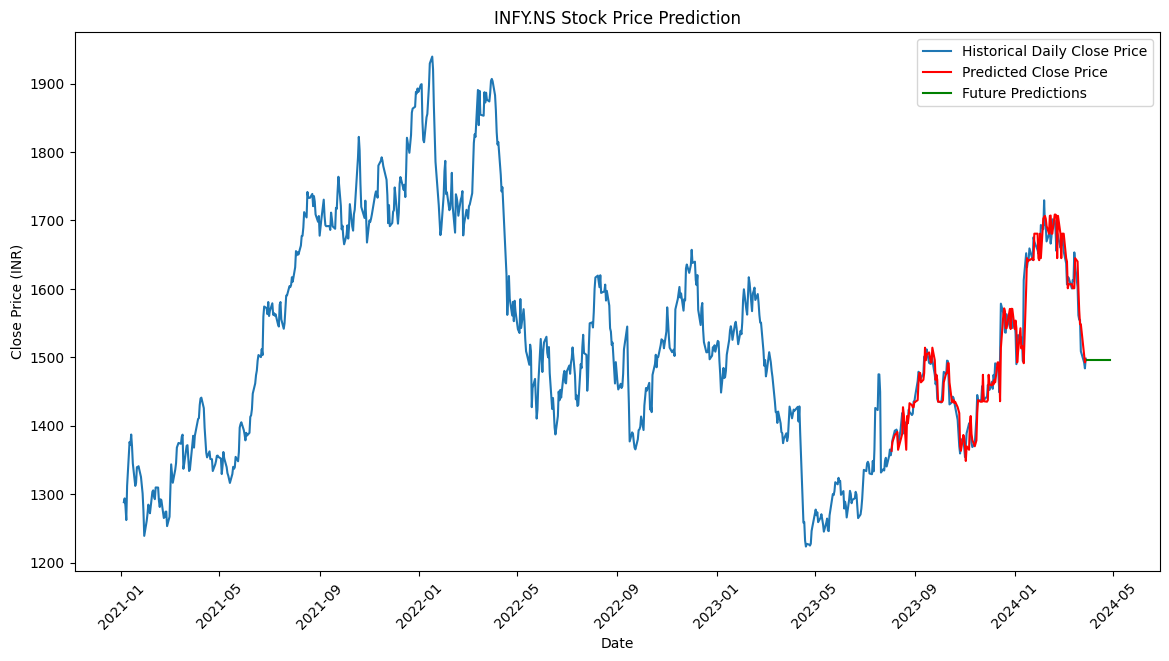

In [44]:
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('INFY.NS.csv')

# Convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Simple feature engineering: Here, we take 'Close' as the target variable
# For simplicity, we might only use 'Close' prices as the feature, but typically, more features are used.
df['Previous Close'] = df['Close'].shift(1)
df.dropna(inplace=True)  # Remove rows with NaN values

X = df[['Previous Close']]  # Features
y = df['Close']  # Target variable

# Splitting the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model training
model = LGBMRegressor()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Predicting next 30 days stock price
last_known_price = df['Close'].iloc[-1]
future_predictions = [last_known_price]
for _ in range(30):
    future_pred = model.predict(np.array(future_predictions[-1]).reshape(-1, 1))
    future_predictions.append(future_pred[0])

future_predictions = future_predictions[1:]  # Ignore the first one which is last known price

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Historical Daily Close Price')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, color='red', label='Predicted Close Price')
plt.xticks(rotation=45)
future_dates = pd.date_range(start=df['Date'].iloc[-1], periods=31, closed='right')
plt.plot(future_dates, future_predictions, color='green', label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.title('INFY.NS Stock Price Prediction')
plt.legend()
plt.show()